In [1]:
# Description: This program uses an artificial reccurent neural network called Long Short Term Memory (LSTM) 
#              to predict the closing cryptocurrency price of Bitcoin. using the past 60 day price. 


In [2]:
#Import the libraries

import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
#Get the crypto quote
df = web.DataReader('BTC-USD', data_source='yahoo', start='2017-01-01', end='2022-06-06')
#Show data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-01,1003.080017,958.698975,963.658020,998.325012,147775008,998.325012
2017-01-02,1031.390015,996.702026,998.617004,1021.750000,222184992,1021.750000
2017-01-03,1044.079956,1021.599976,1021.599976,1043.839966,185168000,1043.839966
2017-01-04,1159.420044,1044.400024,1044.400024,1154.729980,344945984,1154.729980
2017-01-05,1191.099976,910.416992,1156.729980,1013.380005,510199008,1013.380005
...,...,...,...,...,...,...
2022-06-02,30604.734375,29652.705078,29794.890625,30467.488281,29083562061,30467.488281
2022-06-03,30633.035156,29375.689453,30467.806641,29704.390625,26175547452,29704.390625
2022-06-04,29930.564453,29500.005859,29706.138672,29832.914062,16588370958,29832.914062


In [4]:
#Get the number of rows and columns in the data set
df.shape

(1983, 6)

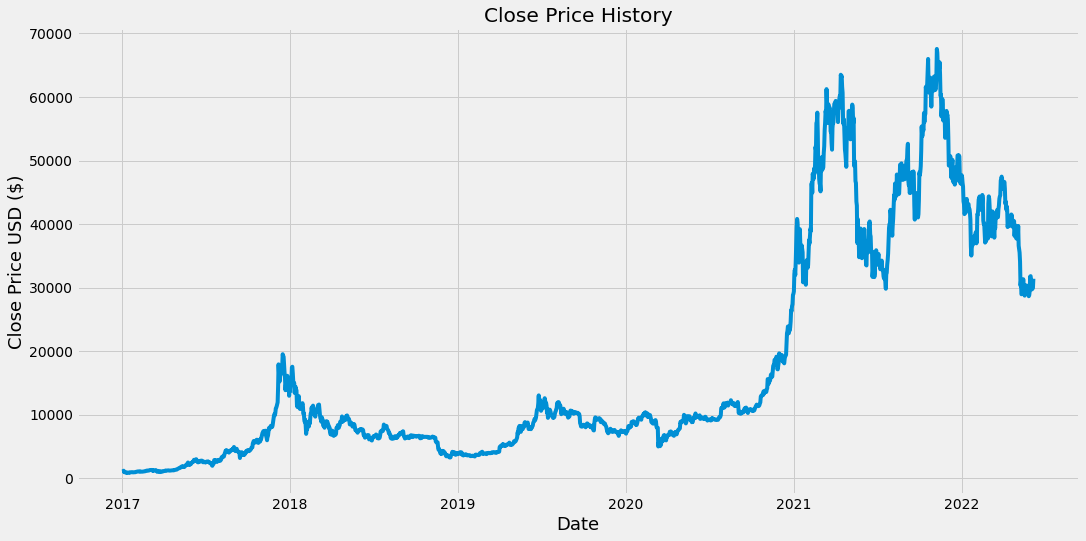

In [5]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [6]:
#Create a new dataframe with only the 'Close column'
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the LSTM model
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

1587

In [7]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00330246],
       [0.00365319],
       [0.00398393],
       ...,
       [0.43502861],
       [0.43613281],
       [0.45823062]])

In [10]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60: i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.00330246, 0.00365319, 0.00398393, 0.00564423, 0.00352787,
       0.00186324, 0.00195882, 0.00199796, 0.00187263, 0.00194526,
       0.        , 0.00040541, 0.00069213, 0.00060871, 0.0006594 ,
       0.00080518, 0.00194914, 0.00162992, 0.0018164 , 0.00175581,
       0.00215652, 0.0021997 , 0.00214489, 0.00172079, 0.00185337,
       0.00209359, 0.00212599, 0.00215354, 0.00212219, 0.00213545,
       0.00288439, 0.00316318, 0.00350421, 0.00377536, 0.00396986,
       0.00373688, 0.00389874, 0.0042461 , 0.00427185, 0.00324343,
       0.00315796, 0.00339416, 0.00331527, 0.00318742, 0.00339566,
       0.00343953, 0.00373838, 0.00401941, 0.00414234, 0.00404427,
       0.00452504, 0.00505387, 0.00508591, 0.00582375, 0.00592796,
       0.00548118, 0.00580099, 0.00602214, 0.00602214, 0.00665892])]
[0.007085784887947722]

[array([0.00330246, 0.00365319, 0.00398393, 0.00564423, 0.00352787,
       0.00186324, 0.00195882, 0.00199796, 0.00187263, 0.00194526,
       0.        , 0.00040541, 0.0

In [11]:
#Convert the x_train and y_train ti numpy arrays to train LSTM model
x_train, y_train = np.array(x_train), np.array(y_train)

In [13]:
#Reshape the data (LSTM is 3D and expect 3 data, our model is 2D)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1527, 60, 1)

In [14]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [15]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [16]:
#Train the model (epoch is number of iterrations when entire dataset is passed forward and backward)
model.fit(x_train, y_train, batch_size=1, epochs=1)

1527/1527 [==============================] - 55s 33ms/step - loss: 0.0020


In [17]:
#Create the testing data
#Create a new array with scaled values
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [18]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [19]:
#Reshape the data (LSTM is 3D and expect 3 data, our model is 2D)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [20]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [21]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

890.53473208649

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


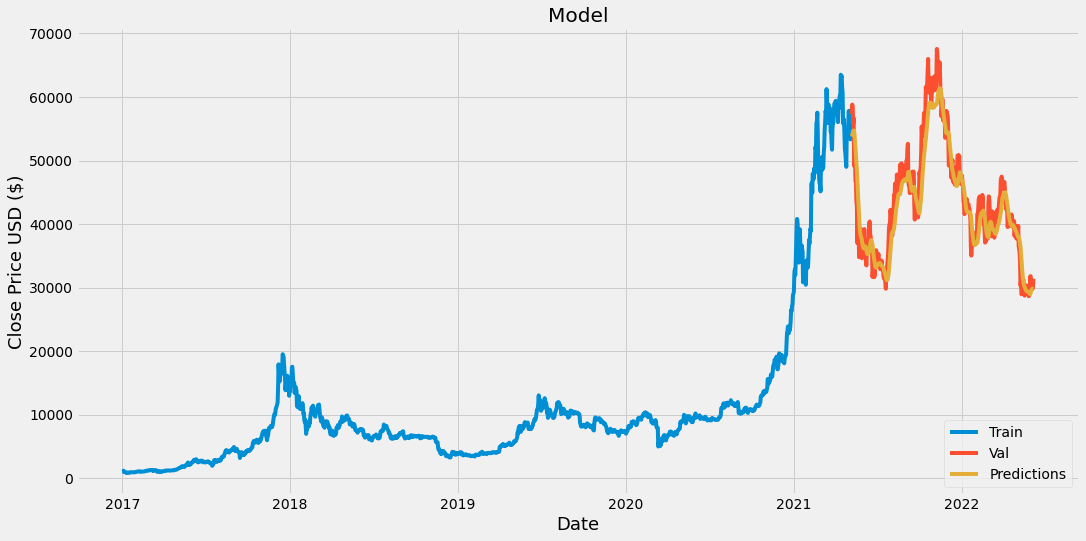

In [22]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [23]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2021-05-07,57356.402344,53773.171875
2021-05-08,58803.777344,53984.531250
2021-05-09,58232.316406,54330.550781
2021-05-10,55859.796875,54648.730469
2021-05-11,56704.574219,54704.488281
...,...,...
2022-06-02,30467.488281,29637.826172
2022-06-03,29704.390625,29774.812500
2022-06-04,29832.914062,29808.486328


In [24]:
#Get the quote
btc_quote  = web.DataReader('BTC-USD', data_source='yahoo', start='2017-01-01', end='2020-01-01')
#Create a new dataframe
new_df = btc_quote.filter(['Close'])
#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[7128.284]]


In [25]:
#Get the quote
btc_quote2  = web.DataReader('BTC-USD', data_source='yahoo', start='2020-01-02', end='2020-01-02')
print(btc_quote2['Close'])

Date
2020-01-02    6985.470215
2020-01-03    7344.884277
Name: Close, dtype: float64


In [26]:
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


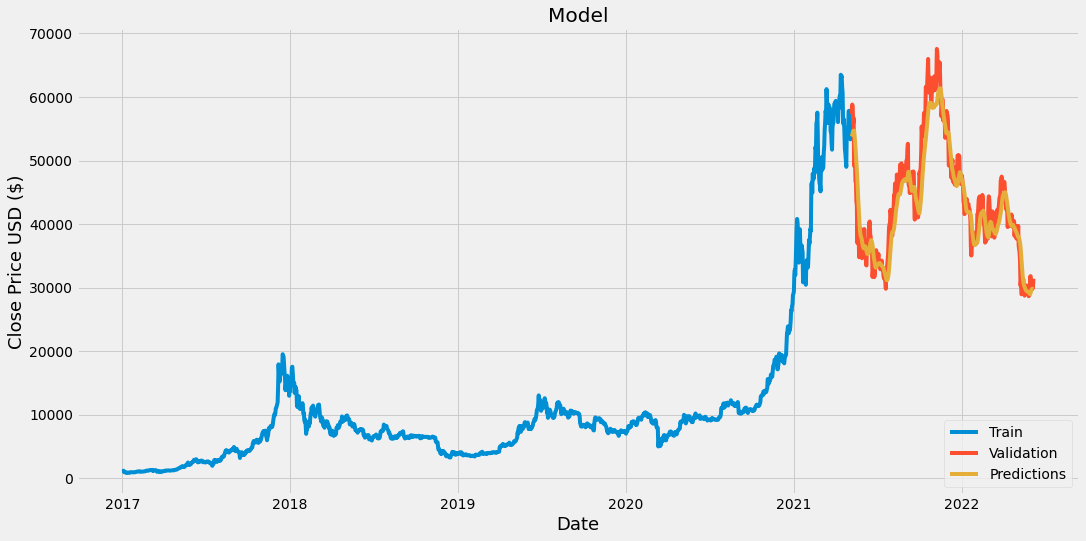

In [28]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'], loc='lower right')
plt.show()